In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the dataset
data = pd.read_csv("House_Rent_Dataset.csv")

In [3]:
data.shape

(4746, 12)

In [4]:
data.sample(6)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4720,2022-06-25,2,17000,1000,3 out of 4,Super Area,"Netaji Nagar Colony, Langar Houz",Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
3531,2022-05-06,1,15000,520,1 out of 3,Super Area,Vadapalani,Chennai,Semi-Furnished,Bachelors/Family,1,Contact Owner
2707,2022-05-11,3,65000,1600,Ground out of 4,Carpet Area,East Of Kailash,Delhi,Furnished,Bachelors/Family,2,Contact Agent
2551,2022-05-27,2,12000,55,Ground out of 4,Super Area,Uttam Nagar,Delhi,Unfurnished,Bachelors/Family,2,Contact Owner
3414,2022-05-02,2,20000,980,3 out of 3,Super Area,Perumbakkam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
986,2022-06-20,3,150000,1600,6 out of 7,Carpet Area,JVPD Scheme,Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Agent


In [5]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
data.describe(include = 'object')

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [8]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [11]:
#drop the columns not required
#axis=1 indicates we are dropping the columns
#axis=o indicates we are dropping the rows
data = data.drop(['Posted On' ,'Floor', 'Area Locality'], axis= 1)

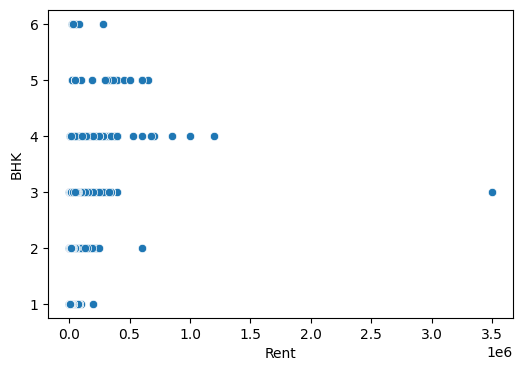

In [12]:
#scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Rent', y= "BHK" , data=data)
plt.show()


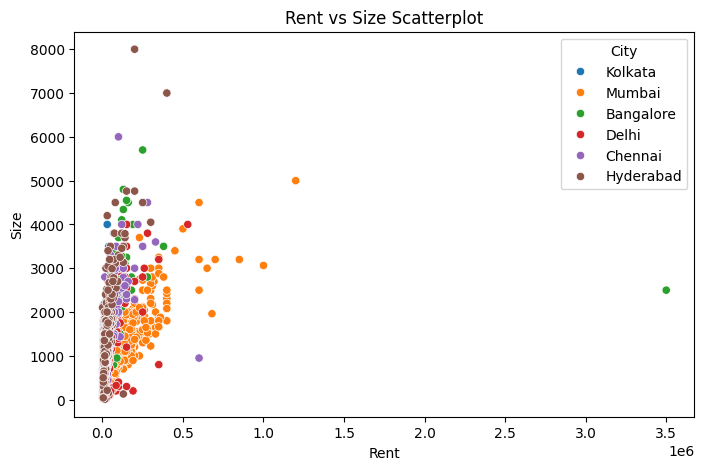

In [13]:
plt.figure(figsize =(8,5))
sns.scatterplot(x="Rent" , y = "Size" , hue = "City" ,data=data)
plt.title("Rent vs Size Scatterplot")
plt.show()

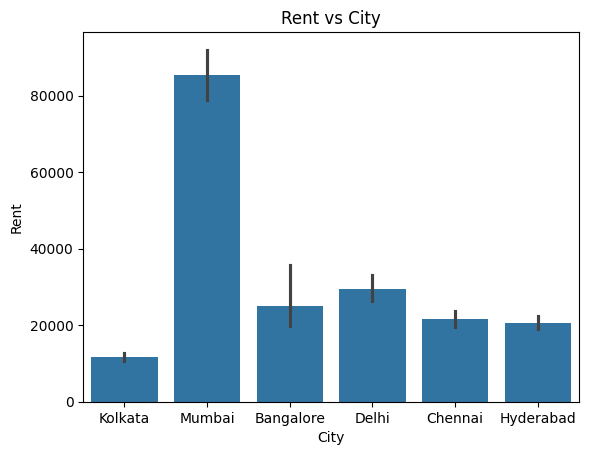

In [14]:
#Red by city
sns.barplot(x="City", y="Rent", data = data)
plt.title("Rent vs City")
plt.show()

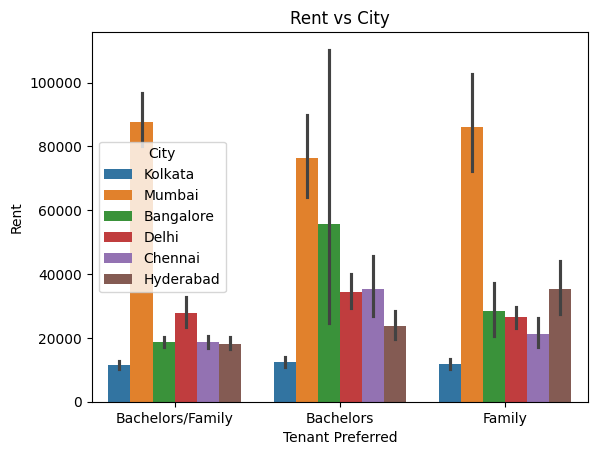

In [15]:
sns.barplot (x="Tenant Preferred" , y = "Rent" , hue = "City" ,data=data) #hue = "City"
plt.title("Rent vs City")
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [17]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [18]:
for col in categorical_cols:
    print(f"{col} : {data[col].nunique()}")

Area Type : 3
City : 6
Furnishing Status : 3
Tenant Preferred : 3
Point of Contact : 3


In [19]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [20]:
x = data.drop(columns="Rent")
y = data["Rent"]

In [21]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [22]:
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

In [23]:
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder(return_df=True)
x = encoder.fit_transform(x, y)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [25]:
x_df = pd.DataFrame(x)

In [26]:
x_df.head()

,0,1,2,3,4,5,6,7
0,-0.100773,0.208960,-0.968207,-0.899659,-1.096256,-0.584197,0.038594,-0.689511
1,-0.100773,-0.264125,-0.968450,-0.900396,0.326793,-0.584646,-1.092067,-0.689628
2,-0.100773,0.051265,-0.968377,-0.900175,0.326910,-0.584512,-1.092067,-0.689593
3,-0.100773,-0.264125,-0.968207,-0.899659,-1.096256,-0.584197,-1.092067,-0.689511
4,-0.100773,-0.185277,1.033212,-0.899475,-1.096135,1.112571,-1.092067,-0.689482


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(3796, 8)

In [29]:
x_test.shape

(950, 8)

In [30]:
x_test.shape , y_test.shape

((950, 8), (950,))

In [31]:
model_rfr = RandomForestRegressor()
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
models = [model_rfr, model_dt, model_lr]

In [32]:
for model in models:
    print(f"Training {model}")
    model.fit(x_train , y_train)

Training RandomForestRegressor()
Training DecisionTreeRegressor()
Training LinearRegression()


In [33]:
for model in models:
    print(f"score of {model} is : {model.score(x_test, y_test)}")

score of RandomForestRegressor() is : 0.9348570263734859
score of DecisionTreeRegressor() is : 0.9373969482009662
score of LinearRegression() is : 0.515358651963779


In [37]:
new_data=pd.DataFrame(
{
    'BHK' : [3],
    'Size' : [1500],
    'Area Type':['Super Area'],
    'City':['Kolkata'], 
    'Furnishing Status':['Furnished'],
    'Tenant Preferred':['Family'],
    'Bathroom':[2],
    'Point of Contact':['Contact Owner']
}
)
new_data_encoder= encoder.transform((new_data))
new_data_scaled = scaler.transform(new_data_encoder)
predicted_rent = model_rfr.predict(new_data_scaled)
print(f"The predicted rent for the new data is: {predicted_rent[0]}")

The predicted rent for the new data is: 16530.0


In [38]:
import pickle

#save model
pickle.dump(model_rfr, open("rent_model.pkl","wb"))

#save encoder
pickle.dump(encoder, open("encoder.pkl","wb"))

#save scaler
pickle.dump(scaler, open("scaler.pkl","wb"))

print("Model, Encoder & Scaler saved successfully!")

Model, Encoder & Scaler saved successfully!
